In [5]:
import numpy as np
import pandas as pd



#### Parte I: Análisis Exploratorio de Datos (45 minutos)
1. **Análisis Exploratorio Detallado**: Realice un análisis exploratorio de los datos proporcionados. Incluya estadísticas descriptivas, análisis de correlaciones, y visualizaciones pertinentes.
2. **Preparación de Datos**: Identifique y trate los valores atípicos y faltantes. Explique sus decisiones.



In [6]:
# Este es el código para generar la BD
# Aumentar el tamaño del conjunto de datos y agregar valores atípicos y faltantes

# Nuevo número de estudiantes en el conjunto de datos
n = 500

# Generación de nuevos datos con más variabilidad
np.random.seed(0)  # Para reproducibilidad
data = {
    "Horas_Estudio": np.random.normal(5, 2, n).clip(0),  # horas de estudio por semana
    "Calificacion_Promedio": np.random.normal(75, 15, n).clip(0, 100),  # calificación promedio
    "Actividades_Extracurriculares": np.random.choice([0, 1], n, p=[0.6, 0.4]),  # participación en actividades extracurriculares
    "Estado_Socioeconomico": np.random.choice(["Bajo", "Medio", "Alto"], n, p=[0.3, 0.5, 0.2]),  # estado socioeconómico
    "Presencia_Tutorias": np.random.choice([0, 1], n, p=[0.7, 0.3])  # si reciben tutorías o no
}

# Crear DataFrame
df = pd.DataFrame(data)

# Introducir valores atípicos
np.random.seed(0)
outliers_indices = np.random.choice(df.index, size=int(0.05 * n), replace=False)  # 5% de valores atípicos
df.loc[outliers_indices, "Horas_Estudio"] *= 3  # Triplicar horas de estudio en valores atípicos

# Introducir datos faltantes
np.random.seed(0)
missing_indices = np.random.choice(df.index, size=int(0.1 * n), replace=False)  # 10% de valores faltantes
df.loc[missing_indices, "Calificacion_Promedio"] = np.nan  # Asignar NaN a calificaciones promedio


# Guardar el DataFrame como archivo CSV
df.to_csv("datos_estudiantes.csv", index=False)


In [7]:
# Estadísticas descriptivas con los nuevos datos
descriptive_stats_updated = df.describe(include='all')
descriptive_stats_updated.transpose()  # Transponer para mejor visualización

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Horas_Estudio,500.0,NaN,NaN,NaN,5.457351,3.213992,0.0,3.628866,5.070461,6.548625,26.537652
Calificacion_Promedio,450.0,NaN,NaN,NaN,73.856064,14.368981,29.307854,64.397106,74.057095,82.883686,100.0
Actividades_Extracurriculares,500.0,NaN,NaN,NaN,0.44,0.496884,0.0,0.0,0.0,1.0,1.0
Estado_Socioeconomico,500,3,Medio,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Presencia_Tutorias,500.0,NaN,NaN,NaN,0.298,0.457838,0.0,0.0,0.0,1.0,1.0


 Aquí está el análisis estadístico descriptivo de este conjunto de datos:

- **Horas de Estudio**
  - Media: 5.46 horas
  - Desviación estándar: 3.21 horas
  - Mínimo: 0 horas
  - Máximo: 26.54 horas (valores atípicos presentes)
  - 25% de los estudiantes estudian menos de 3.63 horas
  - 50% (mediana) de los estudiantes estudian aproximadamente 5.07 horas
  - 75% de los estudiantes estudian menos de 6.55 horas

- **Calificación Promedio** (con datos faltantes)
  - Media: 73.86
  - Desviación estándar: 14.37
  - Mínimo: 29.31
  - Máximo: 100.00
  - 25% de los estudiantes tienen una calificación inferior a 64.40
  - 50% (mediana) tienen una calificación de aproximadamente 74.06
  - 75% tienen una calificación inferior a 82.88

- **Actividades Extracurriculares**
  - 44% de los estudiantes participan en actividades extracurriculares

- **Estado Socioeconómico**
  - El estado más común es 'Medio', presente en 254 estudiantes

- **Presencia de Tutorías**
  - Solo el 29.8% de los estudiantes reciben tutorías

Este análisis proporciona una visión general de los datos. El siguiente paso sería tratar los valores atípicos y los datos faltantes antes de proceder con análisis más avanzados o la construcción de modelos estadísticos.

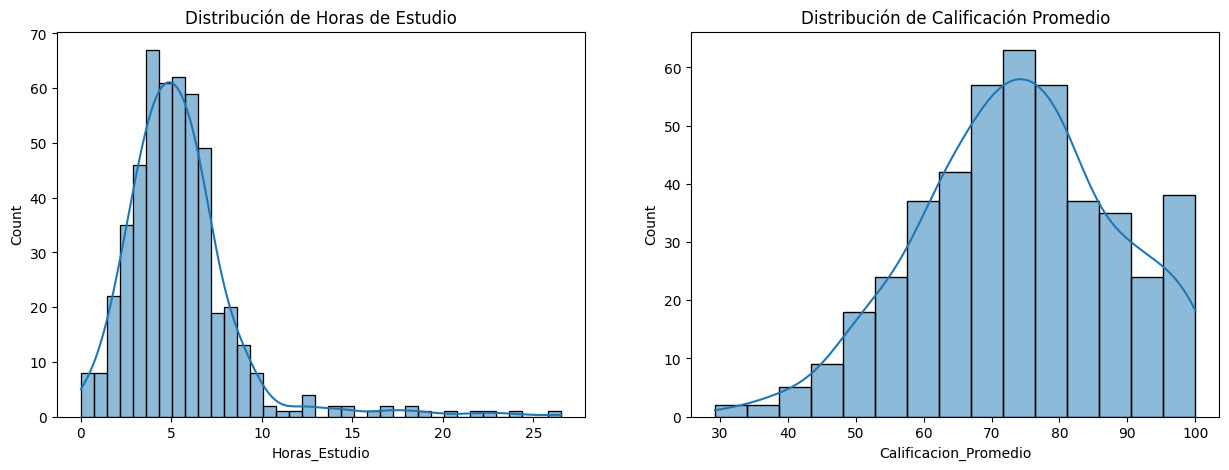

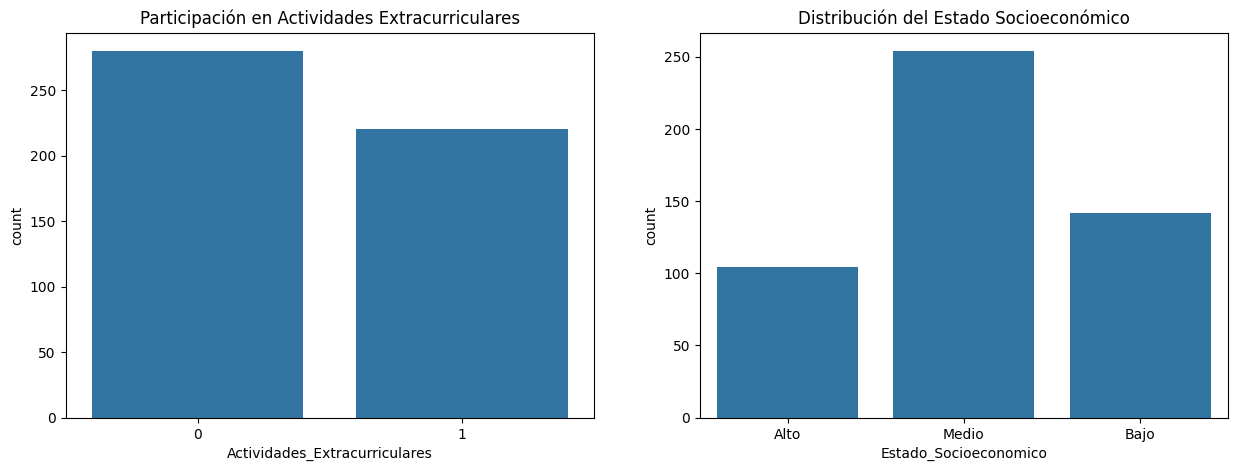

ValueError: could not convert string to float: 'Alto'

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio Detallado

## Visualizaciones para entender mejor la distribución de los datos

# Histogramas para variables numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Horas_Estudio'], kde=True)
plt.title('Distribución de Horas de Estudio')

plt.subplot(1, 2, 2)
sns.histplot(df['Calificacion_Promedio'].dropna(), kde=True)
plt.title('Distribución de Calificación Promedio')

plt.show()

# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0], x='Actividades_Extracurriculares', data=df)
axes[0].set_title('Participación en Actividades Extracurriculares')

sns.countplot(ax=axes[1], x='Estado_Socioeconomico', data=df)
axes[1].set_title('Distribución del Estado Socioeconómico')

plt.show()

# Análisis de Correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Horas_Estudio                  500 non-null    float64
 1   Calificacion_Promedio          450 non-null    float64
 2   Actividades_Extracurriculares  500 non-null    int32  
 3   Estado_Socioeconomico          500 non-null    object 
 4   Presencia_Tutorias             500 non-null    int32  
dtypes: float64(2), int32(2), object(1)
memory usage: 15.8+ KB


In [10]:
# Preparación de Datos: Tratamiento de Valores Atípicos y Faltantes

## Identificación y tratamiento de valores atípicos en 'Horas_Estudio'
q1 = df['Horas_Estudio'].quantile(0.25)
q3 = df['Horas_Estudio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Considerar valores fuera de estos límites como atípicos
outliers = df[(df['Horas_Estudio'] < lower_bound) | (df['Horas_Estudio'] > upper_bound)]
df['Horas_Estudio'] = df['Horas_Estudio'].clip(lower_bound, upper_bound)

## Tratamiento de datos faltantes en 'Calificacion_Promedio'
# Reemplazar con la mediana, ya que la media puede estar sesgada por valores atípicos
median_calificacion = df['Calificacion_Promedio'].median()
df['Calificacion_Promedio'].fillna(median_calificacion, inplace=True)

# Estadísticas descriptivas actualizadas después del tratamiento
updated_descriptive_stats = df.describe(include='all')
updated_descriptive_stats.transpose()  # Transponer para mejor visualización


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Horas_Estudio,500.0,NaN,NaN,NaN,5.210999,2.30812,0.0,3.628866,5.070461,6.548625,10.928263
Calificacion_Promedio,500.0,NaN,NaN,NaN,73.876167,13.630228,29.307854,65.456065,74.057095,81.756095,100.0
Actividades_Extracurriculares,500.0,NaN,NaN,NaN,0.44,0.496884,0.0,0.0,0.0,1.0,1.0
Estado_Socioeconomico,500,3,Medio,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Presencia_Tutorias,500.0,NaN,NaN,NaN,0.298,0.457838,0.0,0.0,0.0,1.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Horas_Estudio                  500 non-null    float64
 1   Calificacion_Promedio          500 non-null    float64
 2   Actividades_Extracurriculares  500 non-null    int32  
 3   Estado_Socioeconomico          500 non-null    object 
 4   Presencia_Tutorias             500 non-null    int32  
dtypes: float64(2), int32(2), object(1)
memory usage: 15.8+ KB


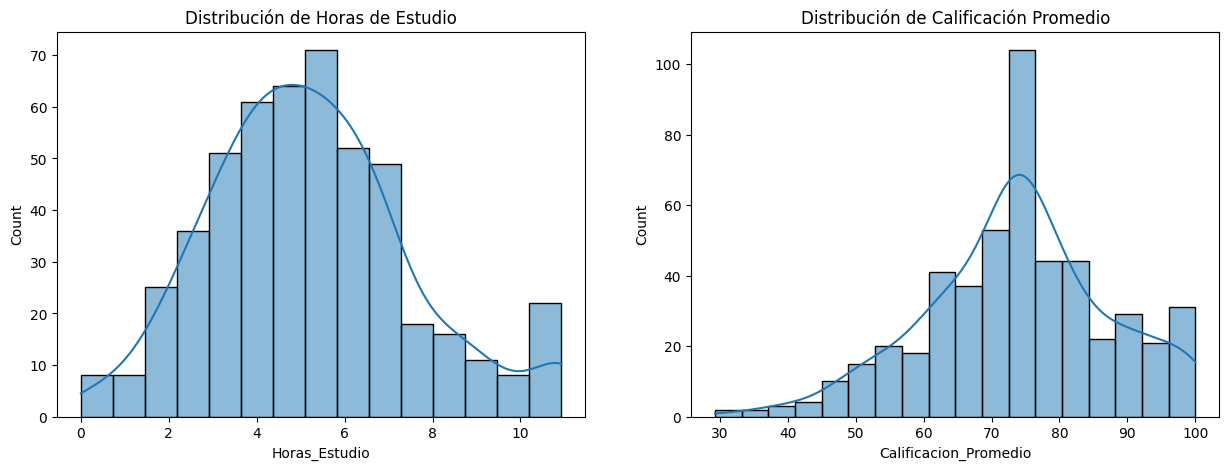

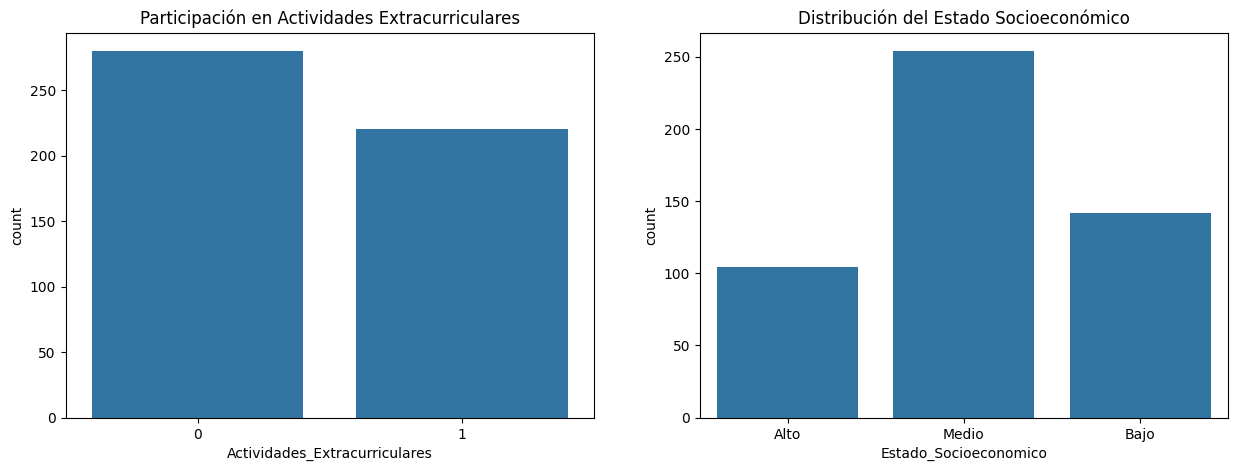

ValueError: could not convert string to float: 'Alto'

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio Detallado

## Visualizaciones para entender mejor la distribución de los datos

# Histogramas para variables numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Horas_Estudio'], kde=True)
plt.title('Distribución de Horas de Estudio')

plt.subplot(1, 2, 2)
sns.histplot(df['Calificacion_Promedio'].dropna(), kde=True)
plt.title('Distribución de Calificación Promedio')

plt.show()

# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0], x='Actividades_Extracurriculares', data=df)
axes[0].set_title('Participación en Actividades Extracurriculares')

sns.countplot(ax=axes[1], x='Estado_Socioeconomico', data=df)
axes[1].set_title('Distribución del Estado Socioeconómico')

plt.show()

# Análisis de Correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()




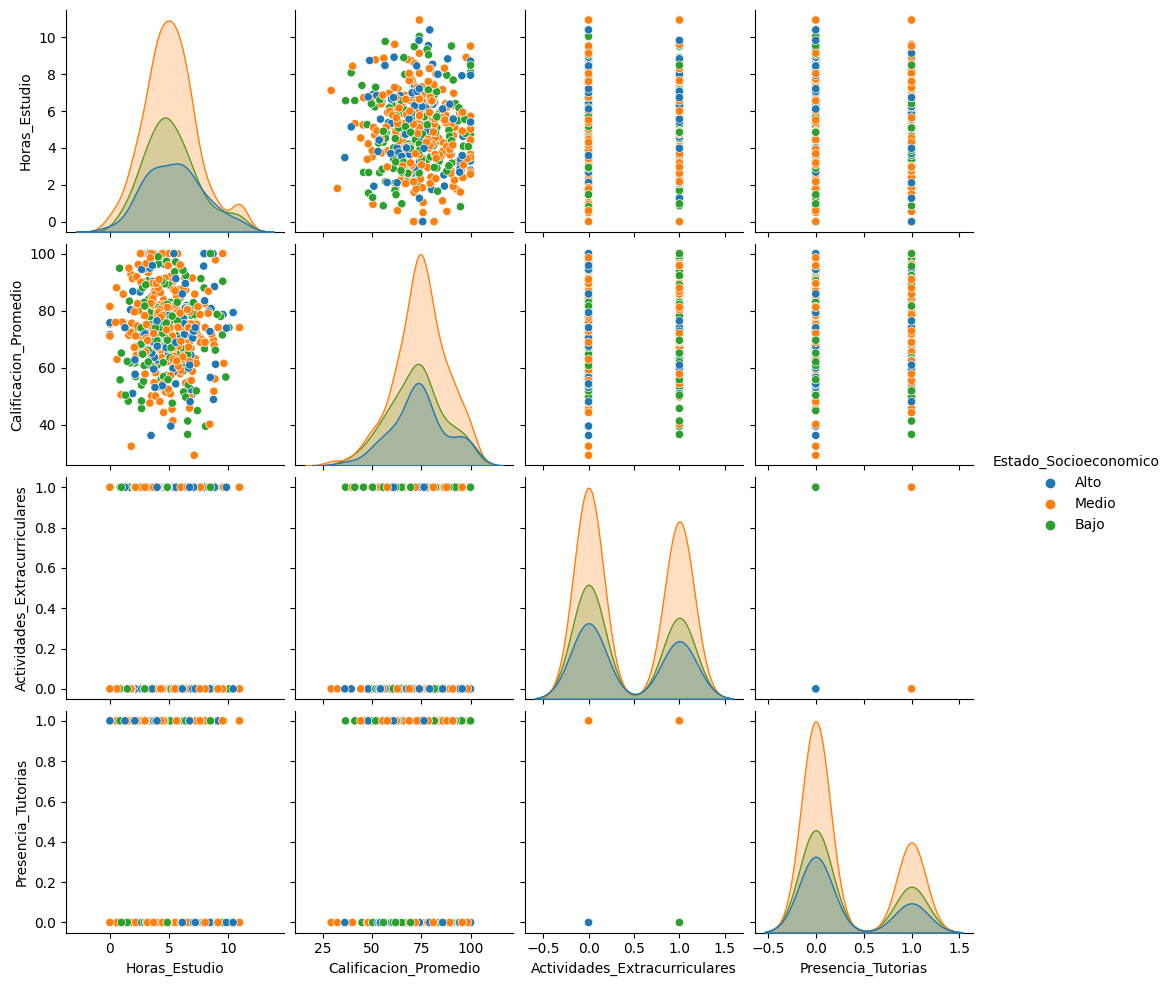

In [ ]:
# Mostrar nuevamente el par plot con ajustes para evitar advertencias
sns.pairplot(df.dropna(), hue='Estado_Socioeconomico')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# Cálculo de la correlación entre 'Actividades_Extracurriculares' y 'Estado_Socioeconomico'
contingency_table = pd.crosstab(df['Actividades_Extracurriculares'], df['Estado_Socioeconomico'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
coefficient_of_contingency = np.sqrt(chi2 / (chi2 + df.shape[0]))

# Cálculo de la correlación entre 'Actividades_Extracurriculares' y 'Presencia_Tutorias'
contingency_table_2 = pd.crosstab(df['Actividades_Extracurriculares'], df['Presencia_Tutorias'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
coefficient_of_contingency_2 = np.sqrt(chi2_2 / (chi2_2 + df.shape[0]))

(coefficient_of_contingency, coefficient_of_contingency_2)

(0.03619533182963037, 0.01708721466154155)

En cuanto a las medidas de correlación para las variables categóricas:

La correlación entre Actividades Extracurriculares y Estado Socioeconómico tiene un coeficiente de contingencia de aproximadamente 0.0362, lo que sugiere una relación muy débil entre estas dos variables.
La correlación entre Actividades Extracurriculares y Presencia de Tutorías tiene un coeficiente de contingencia de aproximadamente 0.0171, lo que sugiere una relación aún más débil.


#### Parte II: Regresión Lineal Múltiple (30 minutos)
1. **Construcción de Modelo**: Construya un modelo de regresión lineal múltiple. Seleccione las variables basándose en criterios estadísticos y justifique su elección.
2. **Interpretación y Diagnóstico**: Interprete los coeficientes y realice un diagnóstico completo de los residuos.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Selección de variables
# Vamos a utilizar 'Horas_Estudio', 'Actividades_Extracurriculares' y 'Presencia_Tutorias' como predictores
# 'Estado_Socioeconomico' también es un factor importante, así que lo incluiremos después de codificarlo como variables dummy
X = df[['Horas_Estudio', 'Actividades_Extracurriculares', 'Presencia_Tutorias']]
X = pd.get_dummies(X, columns=['Actividades_Extracurriculares', 'Presencia_Tutorias'], drop_first=True)
Y = df['Calificacion_Promedio']

# Construcción del modelo con statsmodels para obtener un resumen detallado
X_sm = sm.add_constant(X) # Añadir una constante al modelo
model_sm = sm.OLS(Y, X_sm).fit()

# Interpretación de coeficientes
model_sm_summary = model_sm.summary()

print(model_sm_summary)

                              OLS Regression Results                             
Dep. Variable:     Calificacion_Promedio   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                 -0.005
Method:                    Least Squares   F-statistic:                    0.1551
Date:                   Sat, 25 Nov 2023   Prob (F-statistic):              0.926
Time:                           01:44:09   Log-Likelihood:                -2014.9
No. Observations:                    500   AIC:                             4038.
Df Residuals:                        496   BIC:                             4055.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

El modelo de regresión lineal múltiple se ajustó utilizando 'Horas de Estudio', 'Actividades Extracurriculares' y 'Presencia de Tutorías' como variables independientes y la 'Calificación Promedio' como variable dependiente. Las variables categóricas se codificaron en variables dummy.

Interpretación de Coeficientes:

- const: El coeficiente para la constante es 74.7867, lo que indica que el valor base de la 'Calificación Promedio' es alrededor de 74.79 cuando todas las otras variables son cero.
- Horas_Estudio: Cada hora adicional de estudio se asocia con una disminución de 0.1728 en la 'Calificación Promedio'. Sin embargo, este efecto no es estadísticamente significativo (p > 0.05).
- Actividades_Extracurriculares_1: Participar en actividades extracurriculares se asocia con un aumento de 0.1554 en la 'Calificación Promedio', pero este coeficiente tampoco es estadísticamente significativo (p > 0.05).
- Presencia_Tutorias_1: La presencia de tutorías se asocia con una disminución de 0.2637 en la 'Calificación Promedio', pero al igual que las otras variables, no es estadísticamente significativa (p > 0.05).

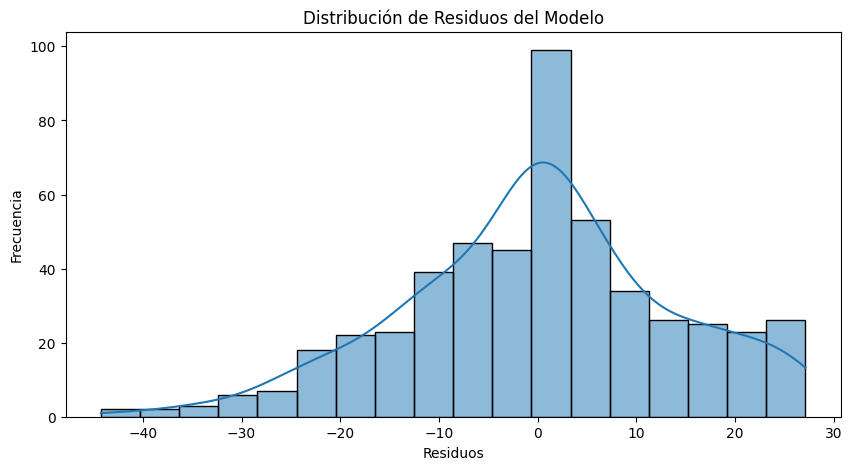

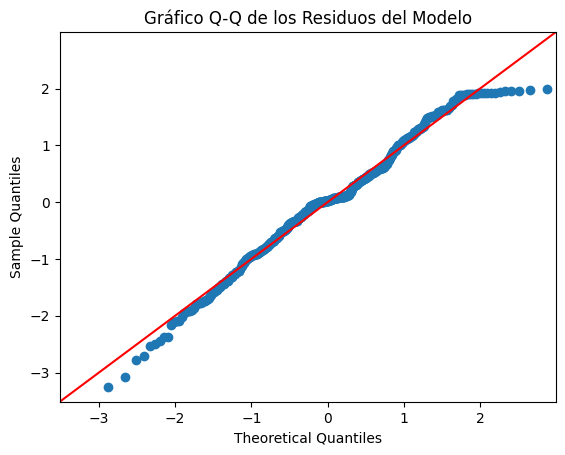

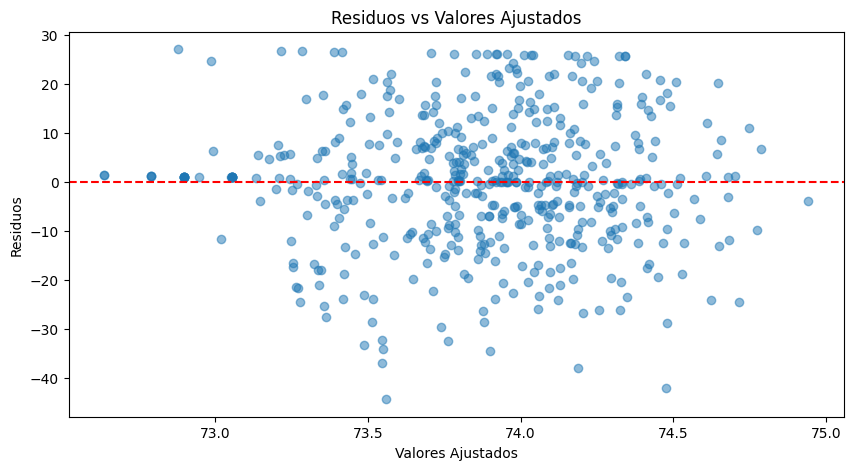

In [ ]:

# Diagnóstico de Residuos con statsmodels
sm_residuals = model_sm.resid

# Histograma de los residuos
plt.figure(figsize=(10, 5))
sns.histplot(sm_residuals, kde=True)
plt.title('Distribución de Residuos del Modelo')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q para evaluar la normalidad de los residuos
fig = sm.qqplot(sm_residuals, line ='45', fit=True)
plt.title('Gráfico Q-Q de los Residuos del Modelo')
plt.show()

# Scatter plot de los residuos para evaluar la homocedasticidad
plt.figure(figsize=(10, 5))
plt.scatter(x=model_sm.fittedvalues, y=sm_residuals, alpha=0.5)
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



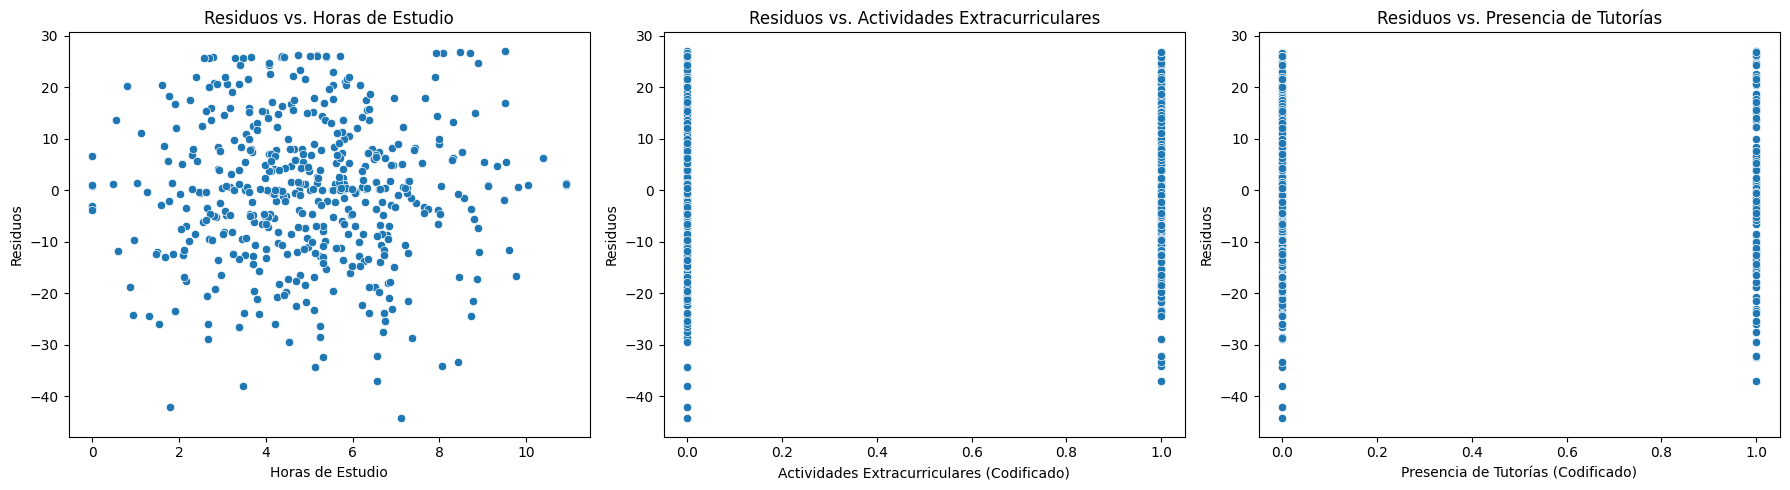

In [ ]:
# Asegurarse de que las variables categóricas estén en el formato correcto
df['Actividades_Extracurriculares'] = df['Actividades_Extracurriculares'].astype('category')
df['Presencia_Tutorias'] = df['Presencia_Tutorias'].astype('category')

# Crear gráficos de residuos vs. cada variable independiente nuevamente
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuos vs. Horas_Estudio
sns.scatterplot(ax=axes[0], x=df['Horas_Estudio'], y=sm_residuals)
axes[0].set_title('Residuos vs. Horas de Estudio')
axes[0].set_xlabel('Horas de Estudio')
axes[0].set_ylabel('Residuos')

# Residuos vs. Actividades_Extracurriculares
sns.scatterplot(ax=axes[1], x=df['Actividades_Extracurriculares'].cat.codes, y=sm_residuals)
axes[1].set_title('Residuos vs. Actividades Extracurriculares')
axes[1].set_xlabel('Actividades Extracurriculares (Codificado)')
axes[1].set_ylabel('Residuos')

# Residuos vs. Presencia_Tutorias
sns.scatterplot(ax=axes[2], x=df['Presencia_Tutorias'].cat.codes, y=sm_residuals)
axes[2].set_title('Residuos vs. Presencia de Tutorías')
axes[2].set_xlabel('Presencia de Tutorías (Codificado)')
axes[2].set_ylabel('Residuos')

plt.tight_layout()
plt.show()


**Diagnóstico de Residuos:**

- La distribución de los residuos parece ser aproximadamente normal, como se muestra en el histograma y el gráfico Q-Q, aunque podría haber ligeras desviaciones de la normalidad.

- El gráfico de dispersión de residuos vs. valores ajustados no muestra patrones claros, lo que es bueno, ya que sugiere homocedasticidad (varianza constante de los residuos).

**Conclusión:**

El modelo tiene un R-cuadrado muy bajo de 0.001, lo que indica que las variables incluidas explican menos del 1% de la variabilidad en las calificaciones promedio. Esto sugiere que el modelo no es adecuado para predecir la 'Calificación Promedio' y que otras variables no incluidas en el modelo pueden ser responsables de la mayoría de la variabilidad en las calificaciones.

En términos de los resultados del diagnóstico, el modelo no muestra problemas significativos de normalidad o homocedasticidad de los residuos, pero esto podría deberse a la falta de ajuste del modelo. Sería recomendable explorar otras variables o interacciones que puedan mejorar la capacidad predictiva del modelo.

In [ ]:
from scipy import stats

# Test estadísticos para análisis de residuos
# Test de normalidad de los residuos (Jarque-Bera)
jb_test = sm.stats.jarque_bera(model_sm.resid)
# Test de homocedasticidad (Breusch-Pagan)
bp_test = sm.stats.diagnostic.het_breuschpagan(model_sm.resid, model_sm.model.exog)

# Devolvemos los resultados de las pruebas estadísticas
(jb_test, bp_test)


((3.684249569929403,
  0.1584803314814158,
  -0.21008358087940793,
  3.0174222712684777),
 (5.4767924801256695,
  0.14003329198678993,
  1.8310492671422767,
  0.1405378908097699))

**Tests Estadísticos:**
Test de Normalidad (Jarque-Bera):

- Estadístico JB: 3.6842
- p-valor: 0.1585
- Coeficiente de asimetría (Skewness): -0.2101
- Curtosis: 3.0174

El p-valor es mayor que 0.05, lo que indica que no rechazamos la hipótesis nula de normalidad de los residuos. Esto sugiere que los residuos pueden considerarse normalmente distribuidos.

Test de Homocedasticidad (Breusch-Pagan):

- Estadístico LM: 5.4768
- p-valor: 0.1400
- f-valor: 1.8310
- p-valor para el f-valor: 0.1405

Con un p-valor mayor que 0.05, no hay suficientes pruebas para rechazar la hipótesis nula de homocedasticidad, lo que sugiere que los residuos tienen varianzas constantes.

#### Parte III: Regresión Regularizada (30 minutos)

1. **Construcción de Modelo**: Aplique la regresión de Lasso y Ridge usando la base de datos fetch_california_housing. Realice la clusterización de las observaciones usando las variables latitud y longitud; seleccione las variables basándose en criterios estadísticos y justifique su elección.




In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos de viviendas de California
california_housing = fetch_california_housing()

# Crear un DataFrame con los datos para facilitar la manipulación
df_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_housing['Target'] = california_housing.target

df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Clusterización de los datos de latitud y longitud
X_geo = df_housing[['Latitude', 'Longitude']]

# Encontrar el número óptimo de clústeres usando el método del codo y la puntuación de silueta
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_geo)
    silhouette_scores.append(silhouette_score(X_geo, kmeans.labels_))

# El número óptimo de clústeres es aquel con la puntuación de silueta más alta
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_silhouette_score = max(silhouette_scores)

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
df_housing['Cluster'] = kmeans.fit_predict(X_geo)


In [ ]:
print(f"El número óptimo de clústeres es: {optimal_clusters}")
print(f"La puntuación de silueta más alta es: {optimal_silhouette_score}")

El número óptimo de clústeres es: 2
La puntuación de silueta más alta es: 0.7562423686755555


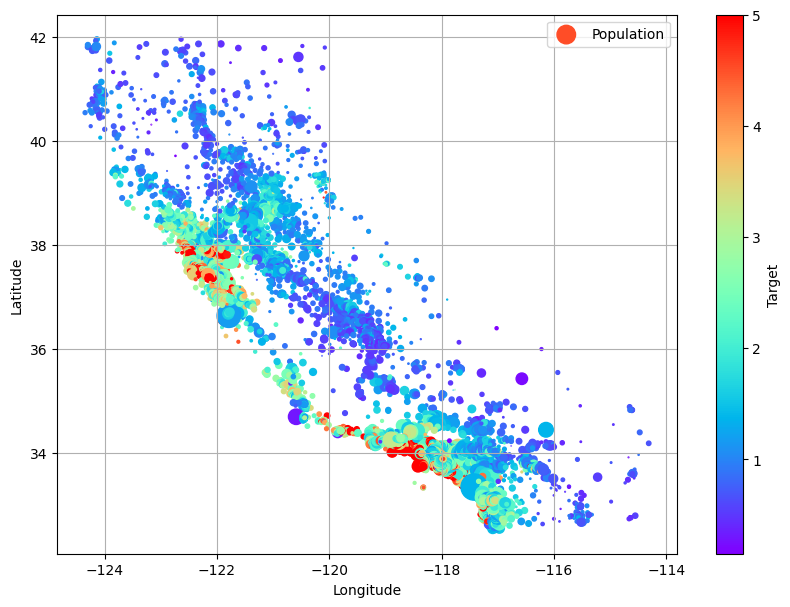

In [ ]:
df_housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=df_housing["Population"] / 100, label="Population",
             c="Target", cmap="rainbow", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
df_housing['Cluster'] = kmeans.fit_predict(X_geo)


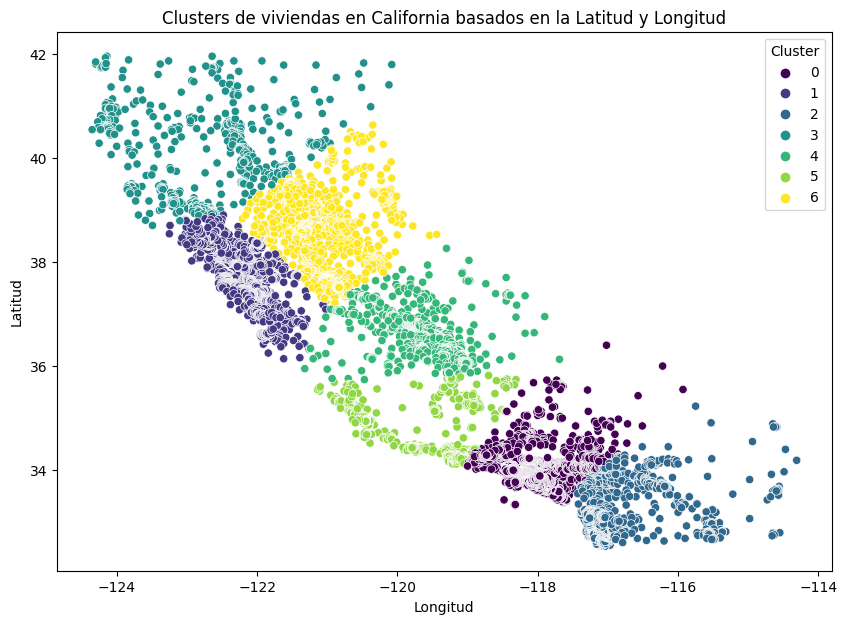

In [ ]:
# Crear el gráfico
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_housing['Longitude'], y=df_housing['Latitude'], hue=df_housing['Cluster'], palette='viridis')
plt.title('Clusters de viviendas en California basados en la Latitud y Longitud')
plt.legend(title='Cluster')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,Cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
 9   Cluster     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


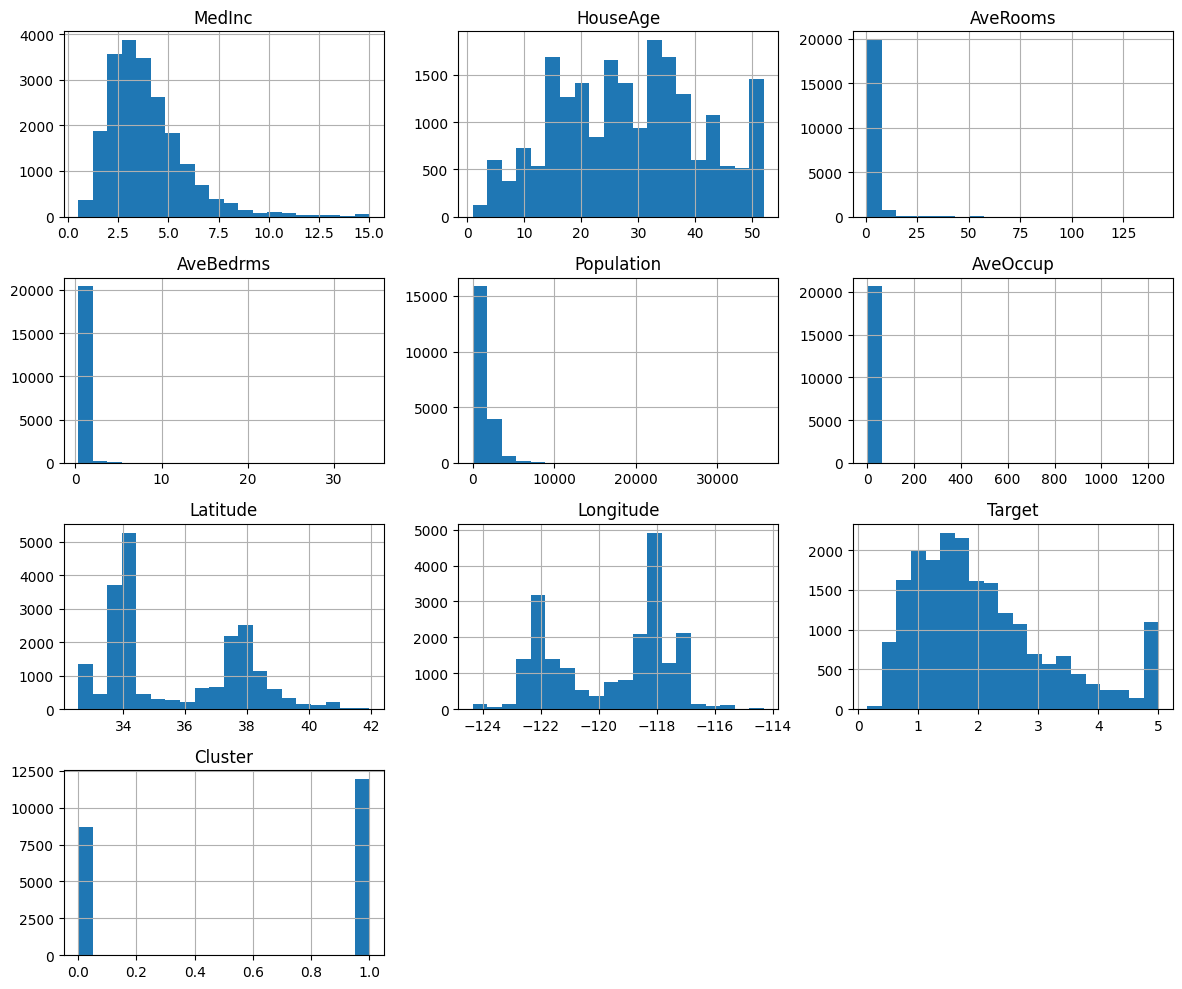

In [ ]:
# Visualización de Distribuciones (Histogramas)
df_housing.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y = df_housing['Target']
X = df_housing.drop(['Target', 'Latitude', 'Longitude'], axis=1)  # Mantenemos la columna 'cluster'

# Definir las transformaciones para las columnas numéricas y categóricas
numeric_features = X.drop(columns=['Cluster']).columns.tolist()  # Excluimos 'cluster' para escalar solo columnas numéricas
categorical_features = ['Cluster']  # La columna 'cluster' es tratada como categórica


# Crear el transformador de columnas con estandarización y codificación one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

# Definimos el pipeline para el modelo de Lasso con el preprocesamiento y el clasificador
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42))])

# Definimos el pipeline para el modelo de Ridge con el preprocesamiento y el clasificador
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5))])



# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamos el modelo de Lasso con el pipeline
lasso_pipeline.fit(X_train, y_train)

# Entrenamos el modelo de Ridge con el pipeline
ridge_pipeline.fit(X_train, y_train)

# Evaluamos los modelos
lasso_score_train = lasso_pipeline.score(X_train, y_train)
ridge_score_train = ridge_pipeline.score(X_train, y_train)
lasso_score_test = lasso_pipeline.score(X_test, y_test)
ridge_score_test = ridge_pipeline.score(X_test, y_test)

# Obtenemos los parámetros alpha seleccionados para cada modelo
lasso_alpha = lasso_pipeline.named_steps['classifier'].alpha_
ridge_alpha = ridge_pipeline.named_steps['classifier'].alpha_

(lasso_alpha, lasso_score_train, lasso_score_test, ridge_alpha, ridge_score_train, ridge_score_test)


(0.001,
 0.5463362583549802,
 0.5119432916629332,
 10.0,
 0.5463644839566937,
 0.5113462039516893)

#### Parte IV: Regresión Logística (30 minutos)

1. **Modelo de Regresión Logística**: Convierta la la variable objetivo en una categorica en una variable binaria y aplique la regresión logística.
2. **Análisis de Resultados**: Interprete los coeficientes y evalúe el rendimiento del modelo utilizando la matriz de confusión y otras métricas relevantes.




In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import statsmodels.api as sm

# Cargar el conjunto de datos de viviendas de California
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Convertir el precio de la casa en una variable categórica basada en la mediana
median_price = np.median(y)
y_categorical = np.where(y > median_price, 1, 0)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Estandarización de las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=data.feature_names)


# Añadir la constante al DataFrame para el intercepto
X_train_with_const = sm.add_constant(X_train_scaled_df)
X_test_with_const = sm.add_constant(X_test_scaled_df)

# Ajustar el modelo de regresión logística
model = sm.Logit(y_train, X_train_with_const).fit()

# Mostrar el resumen con los nombres de las variables
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.386487
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16512
Model:                          Logit   Df Residuals:                    16503
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Nov 2023   Pseudo R-squ.:                  0.4424
Time:                        01:45:02   Log-Likelihood:                -6381.7
converged:                       True   LL-Null:                       -11445.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.025      1.580      0.114      -0.009       0.087
MedInc         2.5946      0.

### Log-Likelihood (LL):
 En el contexto de la regresión logística, el LL se utiliza para evaluar la calidad del modelo: cuanto más cercano esté el valor a cero (o menos negativo), mejor se ajusta el modelo a los datos.

 En los modelos de regresión, donde se asumen distribuciones de probabilidad para los errores, la función de verosimilitud mide la probabilidad de observar los datos dados los parámetros estimados del modelo. Un valor de LL más alto (menos negativo) significa que el modelo tiene una mayor probabilidad de observar los datos dados.

En este modelo, el LL es -6381.7, lo que nos dice es que aun hay variabilidad sin explicar por parte del modelo.

### LL-Null:
El LL-Null es el logaritmo de likelihood para un modelo que solo incluye el intercepto (es decir, un modelo sin variables predictoras). Se utiliza como punto de referencia para comparar si tu modelo es mejor que un modelo sin predictores.

### Likelihood Ratio Test (LLR) y su p-valor:
El LLR compara la log-likelihood de tu modelo contra el LL-Null. Un p-valor asociado bajo (aquí es 0.000) indica que tu modelo es estadísticamente significativamente mejor que el modelo nulo.

### Pseudo R-squared:
El Pseudo R-squared proporciona una idea de la variabilidad explicada por el modelo. Es una analogía al R-squared en la regresión lineal, pero interpretado con precaución ya que no es equivalente al R-squared en términos de proporción de varianza explicada.

In [ ]:
OR_MedInc = np.exp(2.5946)


In [ ]:
OR_MedInc

13.391229798047386


### Interpretación de los Coeficientes (log Odds):
- **MedInc**: Un coeficiente de 2.5946 significa que, manteniendo todas las demás variables constantes, por cada aumento de una unidad en el ingreso medio (MedInc), el logaritmo de odds de que el precio de la vivienda sea alto (vs. bajo) aumenta en 2.5946.


### Odds Ratios (OR):
Los Odds Ratios se pueden calcular exponenciando los coeficientes de la regresión logística. Un OR mayor que 1 indica que el evento es más probable con cada incremento de unidad en la variable predictora.

Por ejemplo, para MedInc:

```python
OR_MedInc = np.exp(2.5946)
```

Esto te dará el cambio en las odds de que el precio de la vivienda sea alto con cada aumento de unidad en el ingreso medio. El valor de 13.391229798047386, indica un cambio en las chances de 13 veces por cada aumento en una unidad en la media del ingreso de la zona donde esta ubicada la vivienda.

Si un Odds Ratio (OR) es menor que 1, indica que el incremento en una unidad de la variable predictora está asociado con una disminución en las odds de que ocurra el evento de interés. En términos de la regresión logística, un OR menor que 1 sugiere una relación negativa entre la variable predictora y la probabilidad del evento.

Por ejemplo, si el OR para una variable es 0.8, esto sugiere que, manteniendo todas las demás variables constantes, cada incremento de una unidad en esa variable reduce las odds del evento en un 20% (ya que 1 - 0.8 = 0.2).



### Efectos Marginales:
Los efectos marginales muestran cómo cambia la probabilidad predicha en promedio cuando una variable independiente cambia en una unidad, manteniendo el resto de variables en su media o en un valor fijo. Para calcular los efectos marginales en `statsmodels`, puedes utilizar:




In [ ]:
mfx = model.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.3228      0.005     60.779      0.000       0.312       0.333
HouseAge       0.0334      0.003     10.730      0.000       0.027       0.039
AveRooms      -0.1071      0.009    -12.504      0.000      -0.124      -0.090
AveBedrms      0.1201      0.008     15.398      0.000       0.105       0.135
Population     0.0075      0.003      2.652      0.008       0.002       0.013
AveOccup      -0.3477      0.035     -9.930      0.000      -0.416      -0.279
Latitude      -0.4543      0.010    -45.458      0.000      -0.474      -0.435
Longitude     -0.4289      0.009    -46.288      0.000      -0.447      -0.411


Lo anterior indica los cambios de probabilidad para cada variable predictora. Recuerda que vamos a expresarlos en puntos basicos.

Recuerda:

-  1% son 100 puntos basicos
- 10% son 1000 puntos basicos.

In [ ]:
# Predecir las etiquetas de clase en el conjunto de prueba y calcular las probabilidades
X_test_sm = sm.add_constant(X_test_scaled)
y_pred = model.predict(X_test_sm) >= 0.5

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test_sm))

print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)
print('\nROC AUC Score:', roc_auc)

Confusion Matrix:
 [[1719  358]
 [ 359 1692]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.83      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128


ROC AUC Score: 0.9086953837471864


Aquí está cómo interpretar cada parte:

### Matriz de Confusión:
```
[[1719  358]
 [ 359 1692]]
```
La matriz de confusión muestra las clasificaciones correctas e incorrectas del modelo:
- **Verdaderos negativos (TN)**: 1719 - El modelo predijo correctamente la clase negativa en 1719 casos.
- **Falsos positivos (FP)**: 358 - El modelo predijo incorrectamente la clase positiva en 358 casos cuando en realidad era negativa.
- **Falsos negativos (FN)**: 359 - El modelo predijo incorrectamente la clase negativa en 359 casos cuando en realidad era positiva.
- **Verdaderos positivos (TP)**: 1692 - El modelo predijo correctamente la clase positiva en 1692 casos.

### Informe de Clasificación:

Este informe incluye varias métricas para cada clase (0 y 1), así como promedios:

- **Precisión**: La proporción de predicciones correctas sobre el total de predicciones para esa clase. Tanto para la clase 0 como para la 1, la precisión es 0.83.

- **Recall (Sensibilidad)**: La proporción de verdaderos positivos identificados correctamente por el modelo. Para la clase 0 es 0.83 y para la clase 1 es 0.82.

- **F1-score**: El promedio armónico de precisión y recall. Un F1-score alto indica un buen equilibrio entre precisión y recall. Aquí, el F1-score es 0.83 para ambas clases.

- **Support**: El número de ocurrencias reales de la clase en el conjunto de datos especificado. Para la clase 0 son 2077 y para la clase 1 son 2051.

Las métricas "macro avg", "weighted avg" y "accuracy" proporcionan promedios de las métricas anteriores:


- **Macro avg**: Calcula la media no ponderada de las métricas por clase.

- **Weighted avg**: Calcula la media ponderada por el soporte de cada clase.

- **Accuracy**: La proporción de todas las predicciones correctas sobre el total de casos. Aquí, la precisión general es 0.83.


### ROC AUC Score:

0.908695387471864


El área bajo la curva (AUC) del receptor operativo característico (ROC) es una medida de la capacidad del modelo para clasificar correctamente las clases. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 indica un rendimiento no mejor que el azar.

* En este caso, el AUC es 0.91, lo que sugiere un muy buen rendimiento del modelo en la discriminación entre las clases positiva y negativa.

#### Parte V: Regresión Logística Regularizada (15 minutos)
1. **Regularización en Regresión Logística**: Implemente regularización L1 y L2 en el modelo de regresión logística. Discuta las diferencias y elija el mejor modelo.



In [ ]:

from sklearn.linear_model import LogisticRegressionCV
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Estandarizar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir y ajustar el modelo de regresión logística regularizado con Lasso (L1)
lasso_log_reg_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42)
lasso_log_reg_cv.fit(X_train_scaled, y_train)

# Definir y ajustar el modelo de regresión logística regularizado con Ridge (L2)
ridge_log_reg_cv = LogisticRegressionCV(cv=5, penalty='l2', random_state=42)
ridge_log_reg_cv.fit(X_train_scaled, y_train)

# Evaluar los modelos
y_pred_lasso = lasso_log_reg_cv.predict(X_test_scaled)
y_pred_ridge = ridge_log_reg_cv.predict(X_test_scaled)


In [ ]:
print('Lasso Logistic Regression')
print(confusion_matrix(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))
print('ROC AUC:', roc_auc_score(y_test, lasso_log_reg_cv.predict_proba(X_test_scaled)[:, 1]))


Lasso Logistic Regression
[[1719  358]
 [ 359 1692]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.83      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

ROC AUC: 0.9086906888310528


In [ ]:
print('Ridge Logistic Regression')
print(confusion_matrix(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))
print('ROC AUC:', roc_auc_score(y_test, ridge_log_reg_cv.predict_proba(X_test_scaled)[:, 1]))


Ridge Logistic Regression
[[1719  358]
 [ 359 1692]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.83      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

ROC AUC: 0.9086758998452321


In [ ]:
# Obtén los nombres de las características del DataFrame original
feature_names = X.columns

# Coeficientes del modelo Lasso
lasso_coefs = pd.DataFrame(lasso_log_reg_cv.coef_.flatten(), index=feature_names, columns=['Lasso Coefficients'])

# Coeficientes del modelo Ridge
ridge_coefs = pd.DataFrame(ridge_log_reg_cv.coef_.flatten(), index=feature_names, columns=['Ridge Coefficients'])

# Muestra los coeficientes de Lasso y Ridge con los nombres de las variables asociados
print("Lasso Coefficients:\n", lasso_coefs)
print("\nRidge Coefficients:\n", ridge_coefs)

Lasso Coefficients:
             Lasso Coefficients
MedInc                2.594717
HouseAge              0.268211
AveRooms             -0.861124
AveBedrms             0.966088
Population            0.060375
AveOccup             -2.794102
Latitude             -3.649341
Longitude            -3.444859

Ridge Coefficients:
             Ridge Coefficients
MedInc                2.593873
HouseAge              0.267994
AveRooms             -0.859993
AveBedrms             0.965178
Population            0.060243
AveOccup             -2.784536
Latitude             -3.650713
Longitude            -3.446123


In [ ]:
# Para Lasso
optimal_C_lasso = lasso_log_reg_cv.C_[0]  # C_ es un array, obtenemos el primer elemento
optimal_lambda_lasso = 1 / optimal_C_lasso

# Para Ridge
optimal_C_ridge = ridge_log_reg_cv.C_[0]  # C_ es un array, obtenemos el primer elemento
optimal_lambda_ridge = 1 / optimal_C_ridge

print(f"El valor óptimo de C para Lasso es: {optimal_C_lasso}, lo que corresponde a un lambda de: {optimal_lambda_lasso}")
print(f"El valor óptimo de C para Ridge es: {optimal_C_ridge}, lo que corresponde a un lambda de: {optimal_lambda_ridge}")


El valor óptimo de C para Lasso es: 166.81005372000558, lo que corresponde a un lambda de: 0.005994842503189421
El valor óptimo de C para Ridge es: 21.54434690031882, lo que corresponde a un lambda de: 0.04641588833612782


#### Parte VI: Estudio de Caso Aplicado (30 minutos)

1. Usted y sus amigos estan interesado en generar una aplicación para celular de bajo costo que ayude a los usuarios a saber el precio de venta de las casas que se ofrecen en el mercado sin tener que usar intermediarios. Utilice los modelos desarrollados para decidir que factores pueden ser clave en el desarrollo de la aplicación.

2. Reflexione sobre las limitaciones de los modelos generados y proponga procedimientos que pueden mejorar el rendimiento. Integre las mejoras propuestas y analice los nuevos resultados para responder la pregunta anterior.
